<a href="https://colab.research.google.com/github/dsrib/datathon/blob/main/Comparativo_educa%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pirâmide etária de Embu-Guaçu - Censo IBGE 2022

---

Objetivo: analisar o percentual de alunos atendidos pela Passos Mágicos, comparado com a população total do município

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [121]:
piramide_etaria = pd.read_csv('/content/drive/MyDrive/FIAP/Fase 5/Datathon/Censo 2022 - Pirâmide etária - Embu-Guaçu (SP).csv', sep=';')

In [122]:
piramide_etaria.head()

,Grupo de idade,População feminina(pessoas),População masculina(pessoas),Município,Sigla UF,Código do Município,codMun
0,100 anos ou mais,4,2,Total,Embu-Guaçu,SP,3515103
1,95 a 99 anos,27,16,Total,Embu-Guaçu,SP,3515103
2,90 a 94 anos,88,41,Total,Embu-Guaçu,SP,3515103
3,85 a 89 anos,201,110,Total,Embu-Guaçu,SP,3515103
4,80 a 84 anos,352,280,Total,Embu-Guaçu,SP,3515103


In [123]:
# Retirar colunas desnecessárias para análise
piramide_etaria.drop(['Município', 'Sigla UF', 'Código do Município', 'codMun'], axis=1, inplace=True)
piramide_etaria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Grupo de idade                21 non-null     object
 1   População feminina(pessoas)   21 non-null     int64 
 2   População masculina(pessoas)  21 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 632.0+ bytes


In [124]:
# Criar coluna com a soma da população por grupo de idade
pop_list=['População feminina(pessoas)', 'População masculina(pessoas)']
piramide_etaria['População por idade']=piramide_etaria[pop_list].sum(axis=1)
piramide_etaria

,Grupo de idade,População feminina(pessoas),População masculina(pessoas),População por idade
0,100 anos ou mais,4,2,6
1,95 a 99 anos,27,16,43
2,90 a 94 anos,88,41,129
3,85 a 89 anos,201,110,311
4,80 a 84 anos,352,280,632
5,75 a 79 anos,616,539,1155
6,70 a 74 anos,1028,831,1859
7,65 a 69 anos,1391,1287,2678
8,60 a 64 anos,1771,1568,3339
9,55 a 59 anos,1968,1723,3691


In [125]:
# Calcular percentuais por faixa etária

pop_total = piramide_etaria['População por idade'].sum()
pop_total

66970

In [126]:
piramide_etaria['Percentual'] = (piramide_etaria['População por idade'] / pop_total * 100)
piramide_etaria.tail()

,Grupo de idade,População feminina(pessoas),População masculina(pessoas),População por idade,Percentual
16,20 a 24 anos,2502,2559,5061,7.557115
17,15 a 19 anos,2342,2526,4868,7.268926
18,10 a 14 anos,2275,2465,4740,7.077796
19,5 a 9 anos,2351,2528,4879,7.285352
20,0 a 4 anos,1935,2144,4079,6.090787


In [127]:
# Selecionar faixas etárias atendidas pela Passos Mágicos: 7 a 26 anos (PEDE, 2022)
piramide2 = piramide_etaria.set_index(['Grupo de idade']).T
idade_escolar = ['5 a 9 anos', '10 a 14 anos', '15 a 19 anos', '20 a 24 anos']
pop_escolar = piramide2[idade_escolar]
pop_escolar

Grupo de idade,5 a 9 anos,10 a 14 anos,15 a 19 anos,20 a 24 anos
População feminina(pessoas),2351.000000,2275.000000,2342.000000,2502.000000
População masculina(pessoas),2528.000000,2465.000000,2526.000000,2559.000000
População por idade,4879.000000,4740.000000,4868.000000,5061.000000
Percentual,7.285352,7.077796,7.268926,7.557115


In [128]:
pop_escolar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, População feminina(pessoas) to Percentual
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   5 a 9 anos    4 non-null      float64
 1   10 a 14 anos  4 non-null      float64
 2   15 a 19 anos  4 non-null      float64
 3   20 a 24 anos  4 non-null      float64
dtypes: float64(4)
memory usage: 160.0+ bytes


In [129]:
pop_escolar.columns

Index(['5 a 9 anos', '10 a 14 anos', '15 a 19 anos', '20 a 24 anos'], dtype='object', name='Grupo de idade')

In [130]:
pop_escolar.columns

Index(['5 a 9 anos', '10 a 14 anos', '15 a 19 anos', '20 a 24 anos'], dtype='object', name='Grupo de idade')

<ipython-input-134-426ad417104e>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bar_width = pop_escolar_ordenada.loc['População por idade'][i]


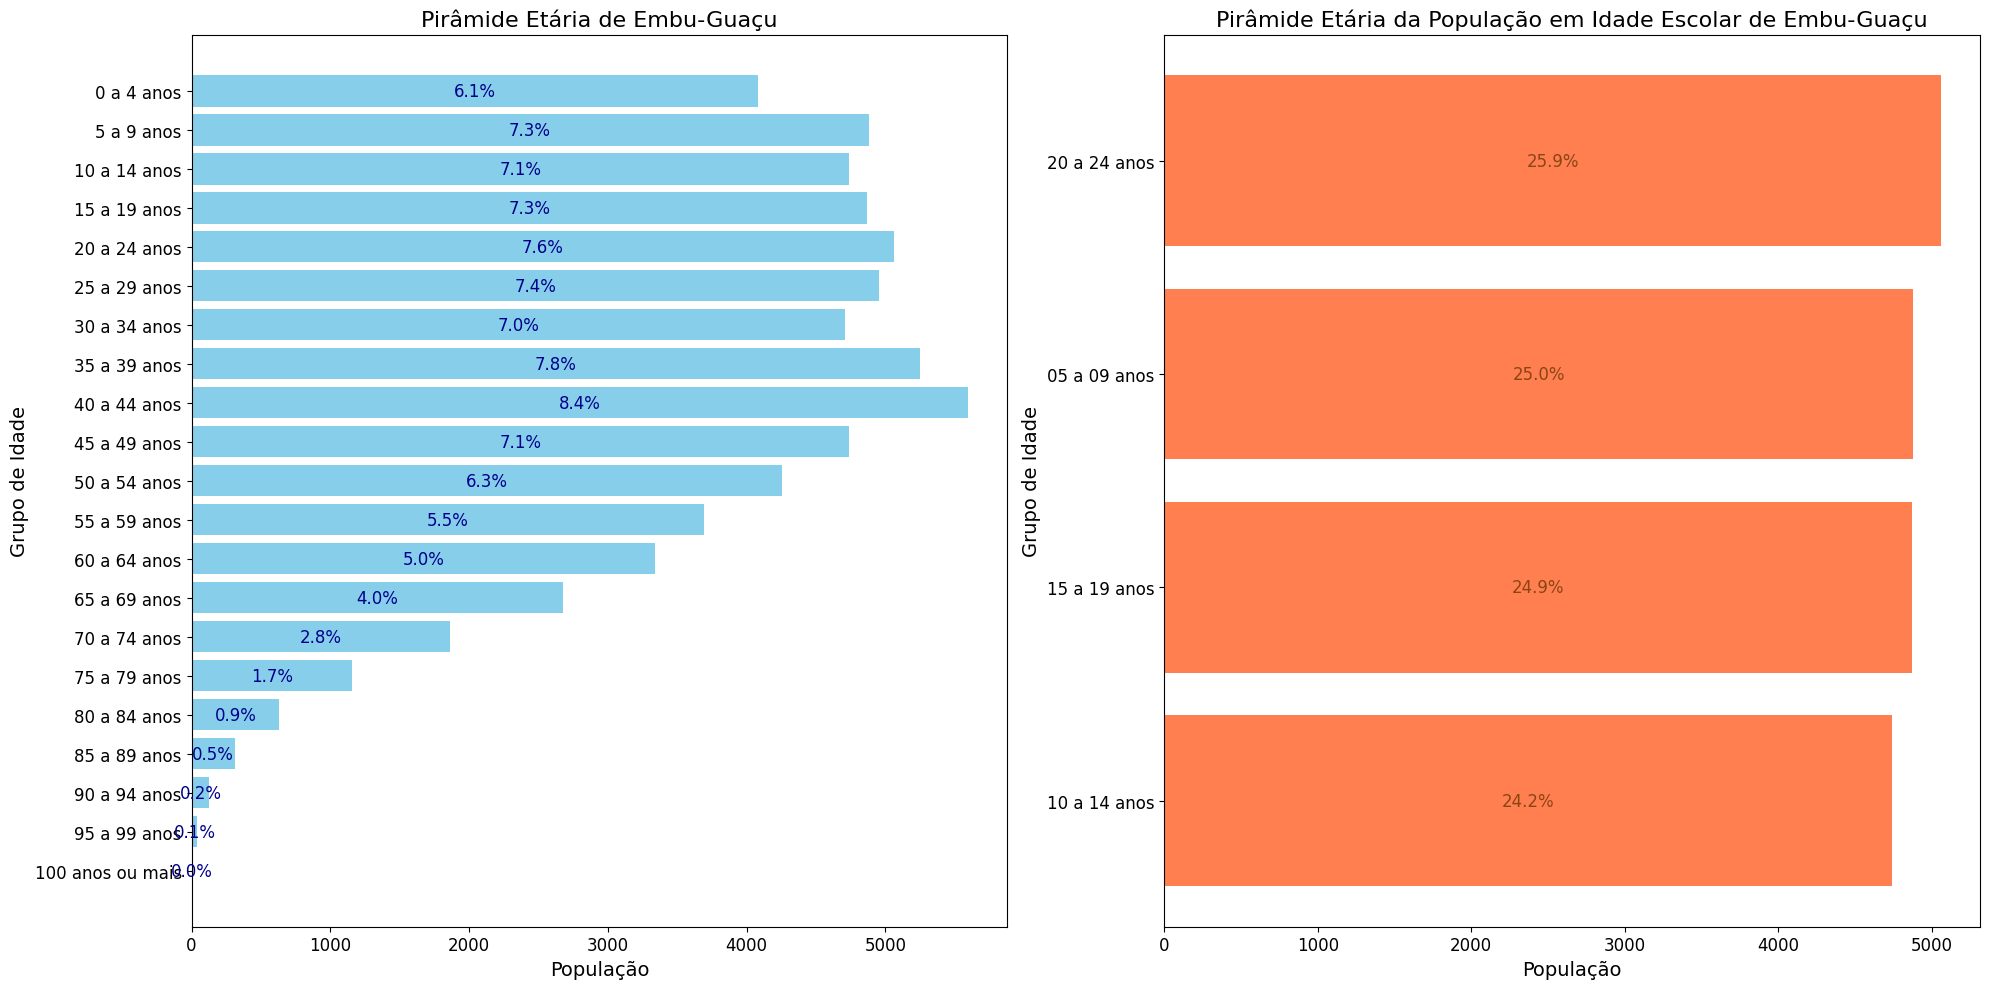

In [134]:
# Calcular o total da população em idade escolar
total_pop_escolar = pop_escolar.loc['População por idade'].sum()

# Ordenar a população em idade escolar em ordem ascendente
pop_escolar_ordenada = pop_escolar.sort_values(by='População por idade', axis=1)

# Criando subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Plotando a pirâmide etária de Embu-Guaçu em barras horizontais
axes[0].barh(piramide_etaria['Grupo de idade'], piramide_etaria['População por idade'], color='skyblue')
axes[0].set_title('Pirâmide Etária de Embu-Guaçu', fontsize=16)
axes[0].set_xlabel('População', fontsize=14)
axes[0].set_ylabel('Grupo de Idade', fontsize=14)
axes[0].tick_params(axis='both', labelsize=12)

# Adicionando labels com o percentual no centro de cada barra
for i, v in enumerate(piramide_etaria['Percentual']):
    bar_width = piramide_etaria['População por idade'][i]
    axes[0].text(bar_width / 2, i, f'{v:.1f}%', va='center', ha='center', color='darkblue', fontsize=12)

# Plotando a pirâmide etária da população em idade escolar em barras horizontais (ordenada)
axes[1].barh(pop_escolar_ordenada.columns, pop_escolar_ordenada.loc['População por idade'], color='coral')
axes[1].set_title('Pirâmide Etária da População em Idade Escolar de Embu-Guaçu', fontsize=16)
axes[1].set_xlabel('População', fontsize=14)
axes[1].set_ylabel('Grupo de Idade', fontsize=14)
axes[1].tick_params(axis='both', labelsize=12)

# Adicionando labels com o percentual em relação ao total da população em idade escolar
for i, v in enumerate(pop_escolar_ordenada.loc['População por idade']):
    percentual_escolar = v / total_pop_escolar * 100
    bar_width = pop_escolar_ordenada.loc['População por idade'][i]
    axes[1].text(bar_width / 2, i, f'{percentual_escolar:.1f}%', va='center', ha='center', color='saddlebrown', fontsize=12)

# Ajustando o layout e exibindo os gráficos
plt.tight_layout()
plt.show()


# Idade dos alunos da Passos Mágicos - Base de dados da ONG

---
Objetivo: analisar o percentual de alunos atendidos pela Passos Mágicos, comparado com a população total do município


In [135]:
# Dados da Passos Mágicos sobre os alunos
dados_alunos = pd.read_csv('/content/drive/MyDrive/FIAP/Fase 5/Datathon/Base de dados - Passos Mágicos/Base de dados - Passos Mágicos/TbAluno/Originais anonimizados/TbAluno.csv', sep=',')
dados_alunos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2238 entries, 0 to 2237
Data columns (total 56 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   IdAluno                                 2238 non-null   int64  
 1   NomeAluno                               2238 non-null   object 
 2   NomeAbreviado                           0 non-null      float64
 3   IdUnidade                               2237 non-null   float64
 4   Sexo                                    2237 non-null   object 
 5   EstadoCivil                             2237 non-null   float64
 6   DataNascimento                          2238 non-null   object 
 7   IdPai                                   800 non-null    float64
 8   IdMae                                   1218 non-null   object 
 9   IdResponsavel                           2237 non-null   float64
 10  IdTipoResponsavel                       2238 non-null   int6

In [136]:
# Selecionar colunas para cálculo da idade dos alunos
colunas_interesse = ['IdAluno', 'DataNascimento']
idade_alunos = dados_alunos[colunas_interesse]
idade_alunos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2238 entries, 0 to 2237
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   IdAluno         2238 non-null   int64 
 1   DataNascimento  2238 non-null   object
dtypes: int64(1), object(1)
memory usage: 35.1+ KB


In [137]:
idade_alunos.iloc[793]

,793
IdAluno,797
DataNascimento,M


In [138]:
dados_alunos.iloc[793]
# Erro na migração de dados: sexo como DN --> COMO CORRIGIR?

,793
IdAluno,797
NomeAluno,Aluno 794
NomeAbreviado,NaN
IdUnidade,NaN
Sexo,NaN
EstadoCivil,NaN
DataNascimento,M
IdPai,5.0
IdMae,2012-05-29 03:00:00
IdResponsavel,NaN


In [139]:
# Retirar da tabela a linha com a migração incorreta
idade_alunos2 = idade_alunos.drop(793)

In [140]:
# Conversão da data de nascimento em data
idade_alunos2['DataNascimento'] = pd.to_datetime(idade_alunos2['DataNascimento'])
idade_alunos2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2237 entries, 0 to 2237
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   IdAluno         2237 non-null   int64         
 1   DataNascimento  2237 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 52.4 KB


In [141]:
# Cálculo da idade
idade_alunos2['Idade']=2022-idade_alunos2['DataNascimento'].dt.year
idade_alunos2.head()

,IdAluno,DataNascimento,Idade
0,3,2005-03-29 03:00:00,17
1,4,2004-11-04 02:00:00,18
2,5,2002-01-25 02:00:00,20
3,6,2002-10-07 03:00:00,20
4,7,2002-12-23 02:00:00,20


In [142]:
# Agrupar alunos por faixa etária do IBGE
fx_etaria = [
    (idade_alunos2['Idade'] >= 5) & (idade_alunos2['Idade'] <= 9),
    (idade_alunos2['Idade'] >= 10) & (idade_alunos2['Idade'] <= 14),
    (idade_alunos2['Idade'] >= 15) & (idade_alunos2['Idade'] <= 19),
    (idade_alunos2['Idade'] >= 20) & (idade_alunos2['Idade'] <= 24),
    (idade_alunos2['Idade'] >= 25)
]

grupos = ['05 a 09 anos', '10 a 14 anos', '15 a 19 anos', '20 a 24 anos', '25 anos ou mais']

idade_alunos2['Grupo de idade'] = np.select(fx_etaria, grupos)
idade_alunos2.head()

,IdAluno,DataNascimento,Idade,Grupo de idade
0,3,2005-03-29 03:00:00,17,15 a 19 anos
1,4,2004-11-04 02:00:00,18,15 a 19 anos
2,5,2002-01-25 02:00:00,20,20 a 24 anos
3,6,2002-10-07 03:00:00,20,20 a 24 anos
4,7,2002-12-23 02:00:00,20,20 a 24 anos


In [143]:
qtde_alunos_idade = idade_alunos2['Grupo de idade'].value_counts().sort_index()
qtde_alunos_idade

,count
Grupo de idade,
0,2
05 a 09 anos,684
10 a 14 anos,1061
15 a 19 anos,428
20 a 24 anos,58
25 anos ou mais,4


<ipython-input-163-fb23baf8efb0>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idade_alunos3['Grupo de idade'] = np.select(fx_etaria, grupos)


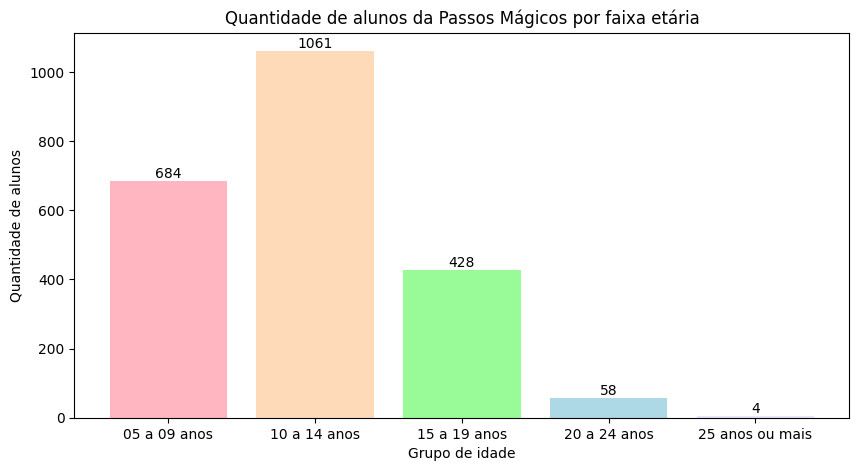

In [163]:
# Filtrar idades maiores que 0
idade_alunos3 = idade_alunos2[idade_alunos2['Idade'] > 0]

# Agrupar alunos por faixa etária do IBGE (excluindo idade 0)
fx_etaria = [
    (idade_alunos3['Idade'] >= 5) & (idade_alunos3['Idade'] <= 9),
    (idade_alunos3['Idade'] >= 10) & (idade_alunos3['Idade'] <= 14),
    (idade_alunos3['Idade'] >= 15) & (idade_alunos3['Idade'] <= 19),
    (idade_alunos3['Idade'] >= 20) & (idade_alunos3['Idade'] <= 24),
    (idade_alunos3['Idade'] >= 25)
]

grupos = ['05 a 09 anos', '10 a 14 anos', '15 a 19 anos', '20 a 24 anos', '25 anos ou mais']

idade_alunos3['Grupo de idade'] = np.select(fx_etaria, grupos)

# Contar alunos por faixa etária (excluindo idade 0)
qtde_alunos_idade = idade_alunos3['Grupo de idade'].value_counts().sort_index()

# Cores em tons pastel
cores_pastel = ['#FFB6C1', '#FFDAB9', '#98FB98', '#ADD8E6', '#E6E6FA']

# Plotar gráfico com a quantidade de alunos por faixa etária (excluindo idade 0 e com cores pastel)
fig, ax = plt.subplots(figsize=(10,5))
bars = ax.bar(qtde_alunos_idade.index, qtde_alunos_idade.values, color=cores_pastel)
ax.set_ylabel('Quantidade de alunos')
ax.set_xlabel('Grupo de idade')
ax.set_title('Quantidade de alunos da Passos Mágicos por faixa etária')

# Adicionar labels acima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, yval, ha='center', va='bottom')

plt.show()


# População de Embu-Guaçu atendida pela Passos Mágicos

---
Objetivo: analisar o percentual de alunos atendidos pela Passos Mágicos, comparado com a população total do município

In [145]:
pop_escolar

Grupo de idade,05 a 09 anos,10 a 14 anos,15 a 19 anos,20 a 24 anos
População feminina(pessoas),2351.000000,2275.000000,2342.000000,2502.000000
População masculina(pessoas),2528.000000,2465.000000,2526.000000,2559.000000
População por idade,4879.000000,4740.000000,4868.000000,5061.000000
Percentual,7.285352,7.077796,7.268926,7.557115


In [146]:
# Renomear o grupo 5 a 9 anos

pop_escolar.rename(columns={'5 a 9 anos': '05 a 09 anos'}, inplace=True)
pop_escolar

Grupo de idade,05 a 09 anos,10 a 14 anos,15 a 19 anos,20 a 24 anos
População feminina(pessoas),2351.000000,2275.000000,2342.000000,2502.000000
População masculina(pessoas),2528.000000,2465.000000,2526.000000,2559.000000
População por idade,4879.000000,4740.000000,4868.000000,5061.000000
Percentual,7.285352,7.077796,7.268926,7.557115


In [147]:
pop_escolar2 = pop_escolar.transpose()
pop_escolar2

,População feminina(pessoas),População masculina(pessoas),População por idade,Percentual
Grupo de idade,,,,
05 a 09 anos,2351.0,2528.0,4879.0,7.285352
10 a 14 anos,2275.0,2465.0,4740.0,7.077796
15 a 19 anos,2342.0,2526.0,4868.0,7.268926
20 a 24 anos,2502.0,2559.0,5061.0,7.557115


In [148]:
pop_escolar2['Alunos Passos Mágicos'] = qtde_alunos_idade
pop_escolar2

,População feminina(pessoas),População masculina(pessoas),População por idade,Percentual,Alunos Passos Mágicos
Grupo de idade,,,,,
05 a 09 anos,2351.0,2528.0,4879.0,7.285352,684
10 a 14 anos,2275.0,2465.0,4740.0,7.077796,1061
15 a 19 anos,2342.0,2526.0,4868.0,7.268926,428
20 a 24 anos,2502.0,2559.0,5061.0,7.557115,58


In [149]:
# Cálculo do percentual da população de Embu-Guaçu atendida pela ONG Passos Mágicos

pop_escolar2['População atendida'] = (pop_escolar2['Alunos Passos Mágicos'] / pop_escolar2['População por idade']) * 100
pop_escolar2

,População feminina(pessoas),População masculina(pessoas),População por idade,Percentual,Alunos Passos Mágicos,População atendida
Grupo de idade,,,,,,
05 a 09 anos,2351.0,2528.0,4879.0,7.285352,684,14.019266
10 a 14 anos,2275.0,2465.0,4740.0,7.077796,1061,22.383966
15 a 19 anos,2342.0,2526.0,4868.0,7.268926,428,8.792112
20 a 24 anos,2502.0,2559.0,5061.0,7.557115,58,1.146019


In [150]:
## DESTAQUES: POPULAÇÃO DE 05 A 09 E DE 10 A 14 ANOS

In [151]:
percentual_total = pop_escolar2['Alunos Passos Mágicos'].sum() / pop_escolar2['População por idade'].sum() * 100
percentual_total

11.41293226928586

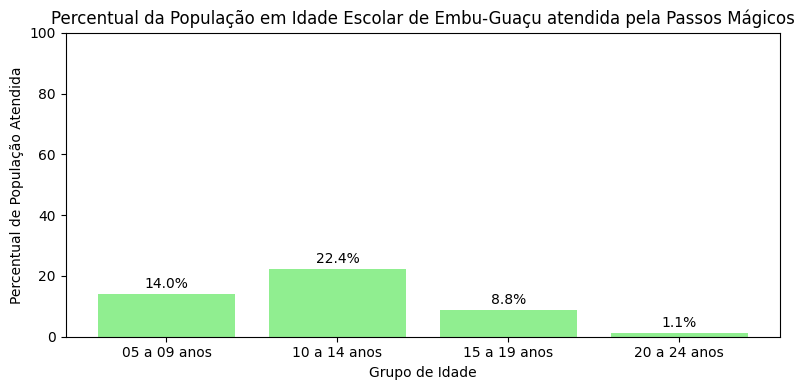

In [160]:
# prompt: plotar gráfico com o percentual de alunos atendidos pela passos mágicos em relação a populaçao em idade escolar

import matplotlib.pyplot as plt
# Plotando o gráfico de barras
plt.figure(figsize=(8, 4))
plt.bar(pop_escolar2.index, pop_escolar2['População atendida'], color='lightgreen')
plt.xlabel('Grupo de Idade')
plt.ylabel('Percentual de População Atendida')
plt.title('Percentual da População em Idade Escolar de Embu-Guaçu atendida pela Passos Mágicos')
plt.ylim(0, 100)  # Define o limite do eixo y para 100%

# Adicionando os valores do percentual acima de cada barra
for i, v in enumerate(pop_escolar2['População atendida']):
    plt.text(i, v + 2, f'{v:.1f}%', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


# IDEB de Embu-Guaçu

---
Objetivo: avaliar a evolução do IDEB do município antes e depois da criação da ONG Passos Mágicos

In [153]:
evolucao_ideb = pd.read_excel('/content/drive/MyDrive/FIAP/Fase 5/Datathon/dados edu/evolucao_ideb.xlsx')
evolucao_ideb.head()

,ibge_id,dependencia_id,ciclo_id,ano,ideb,fluxo,aprendizado,nota_mt,nota_lp
0,3515103,2,AI,2015,6.2,0.9960,6.2591,232.09,212.62
1,3515103,3,AI,2015,6.1,0.9847,6.1782,228.70,211.73
2,3515103,5,AI,2015,6.2,0.9919,6.2364,231.14,212.37
3,3515103,2,AF,2015,4.8,0.9639,4.9838,252.75,246.28
4,3515103,3,AF,2015,5.1,0.9455,5.3412,266.34,254.13


In [154]:
# Substituir o código da dependencia pela palavra

# Convert 'dependencia_id' to string type
evolucao_ideb['dependencia_id'] = evolucao_ideb['dependencia_id'].astype(str)

# Use a dictionary for mapping replacement values
replace_dict = {'1': 'Federal', '2': 'Estadual', '3': 'Municipal', '4': 'Privada', '5': 'Pública'}
evolucao_ideb['dependencia_id'] = evolucao_ideb['dependencia_id'].replace(replace_dict)

evolucao_ideb.head()

,ibge_id,dependencia_id,ciclo_id,ano,ideb,fluxo,aprendizado,nota_mt,nota_lp
0,3515103,Estadual,AI,2015,6.2,0.9960,6.2591,232.09,212.62
1,3515103,Municipal,AI,2015,6.1,0.9847,6.1782,228.70,211.73
2,3515103,Pública,AI,2015,6.2,0.9919,6.2364,231.14,212.37
3,3515103,Estadual,AF,2015,4.8,0.9639,4.9838,252.75,246.28
4,3515103,Municipal,AF,2015,5.1,0.9455,5.3412,266.34,254.13


In [155]:
evolucao_ideb.describe()

,ibge_id,ano,ideb,fluxo,aprendizado,nota_mt,nota_lp
count,30.0,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,3515103.0,2018.200000,5.316667,0.979583,5.423510,246.226000,240.698333
std,0.0,2.203446,0.807757,0.026843,0.739595,17.882334,24.480396
min,3515103.0,2015.000000,4.000000,0.895700,4.387200,209.110000,198.030000
25%,3515103.0,2017.000000,4.800000,0.976000,4.949675,232.885000,214.570000
50%,3515103.0,2019.000000,5.200000,0.992050,5.206050,248.945000,248.905000
75%,3515103.0,2020.500000,6.075000,0.996000,6.103550,258.132500,256.730000
max,3515103.0,2021.000000,6.800000,0.999400,6.833000,277.200000,277.410000


In [156]:
evolucao_ideb.groupby(evolucao_ideb['ano'])['ciclo_id']
evolucao_ideb.head()

,ibge_id,dependencia_id,ciclo_id,ano,ideb,fluxo,aprendizado,nota_mt,nota_lp
0,3515103,Estadual,AI,2015,6.2,0.9960,6.2591,232.09,212.62
1,3515103,Municipal,AI,2015,6.1,0.9847,6.1782,228.70,211.73
2,3515103,Pública,AI,2015,6.2,0.9919,6.2364,231.14,212.37
3,3515103,Estadual,AF,2015,4.8,0.9639,4.9838,252.75,246.28
4,3515103,Municipal,AF,2015,5.1,0.9455,5.3412,266.34,254.13


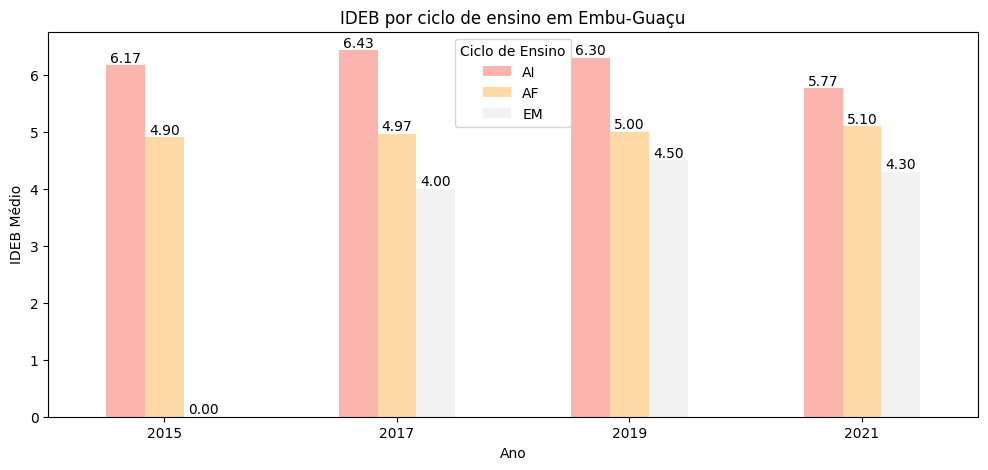

In [161]:
# Group the data by year and ciclo_id
grouped_data = evolucao_ideb.groupby(['ano', 'ciclo_id'])['ideb'].mean().unstack()

# Reorder the columns to place 'AI' before 'AF'
grouped_data = grouped_data[['AI', 'AF', 'EM']]

# Plot a bar chart with pastel colors
ax = grouped_data.plot(kind='bar', figsize=(12, 5), colormap='Pastel1')
plt.title('IDEB por ciclo de ensino em Embu-Guaçu')
plt.xlabel('Ano')
plt.ylabel('IDEB Médio')
plt.legend(title='Ciclo de Ensino', loc='upper center')
plt.xticks(rotation=0)

# Add labels with IDEB values
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')

plt.show()
